In [25]:
using Gadfly

In [24]:
norm(x) = sqrt(x'*x)

norm (generic function with 1 method)

In [26]:
function search_for_alpha(f,xk,fk,d,g;α0=100,ϵ=0.5,t=0.5)
    α=α0
    φ0=d'*g
    while f((xk.+α*d)...) > fk+ ϵ*α*φ0
        α=t*α
    end
    return α
end

search_for_alpha (generic function with 1 method)

## 最速下降法

In [32]:
function steepest_descent(f,g,x0;##最速下降法....Rosenbrock
        ϵx=0.01,#precision for step size 
        ϵf=0.01,
        ϵg=0.01,
        maxIterations=128,
        debug=false)
        a=[]
    xk=x0
    fk=f(xk...)#...
    push!(a,xk)
    for i in 1:maxIterations 
        #iteration 
        d=-g(xk...)
        α=search_for_alpha(f,xk,fk,d,-d)##大问题分解成小问题
        δ=α*d#delta，alpha，epsilon，
        xn=xk.+δ #xn=x(k+1)
        fn=f(xn...)
        push!(a,xn)
        #convergence?是否满足这些条件
          if (norm(δ)<=ϵx)&&(abs(fn-fk)<=ϵf)&&(norm(d)<=ϵg)#梯度用d，norm计算
            println(" convergence is reached after " ,i, " iterations ")
            return xk,fk,d,a
          end 
         if debug
           println("i=",i,"α=",α,"xk=",xk,"d=",d,"δ=",δ)#print(".")
        end
        
          xk=xn
          fk=fn
    end 
    println("WARN:",maxIterations,"iteration have been exceeded!")
end

steepest_descent (generic function with 1 method)

In [48]:
xk,fk,d,a=
steepest_descent(
(x,y)->x^2+3x*y+12y^2-x-4y,
(x,y)->[2x+3y-1, 24y+3x-4],
 [1.,1.],
    maxIterations=100,
    debug=false
)

 convergence is reached after 26 iterations 


([0.311716, 0.127787], -0.41024316788308884, [-0.00679417, -0.00204353], Any[[1.0, 1.0], [0.902344, 0.438477], [0.850583, 0.213123], [0.817855, 0.123604], [0.768709, 0.0542651], [0.631948, 0.130732], [0.599912, 0.0802723], [0.556881, 0.107003], [0.514423, 0.0836903], [0.500755, 0.105573]  …  [0.338964, 0.124889], [0.328691, 0.12211], [0.328112, 0.124144], [0.326713, 0.125912], [0.31454, 0.12512], [0.314432, 0.126426], [0.314034, 0.127524], [0.311956, 0.127002], [0.311716, 0.127787], [0.311053, 0.127588]])

In [58]:
scatter1=
layer(x=[ a[i][1] for i in 1:length(a)],
y=[ a[i][2] for i in 1:length(a)],
   label=[ string(i) for i in 1:length(a)],
Geom.point,Geom.line,Geom.label,Theme(default_color=colorant"red"))

3-element Array{Layer,1}:
 Layer(nothing, Dict{Symbol,Any}(:y=>[1.0, 0.438477, 0.213123, 0.123604, 0.0542651, 0.130732, 0.0802723, 0.107003, 0.0836903, 0.105573  …  0.124889, 0.12211, 0.124144, 0.125912, 0.12512, 0.126426, 0.127524, 0.127002, 0.127787, 0.127588],:label=>["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"  …  "18", "19", "20", "21", "22", "23", "24", "25", "26", "27"],:x=>[1.0, 0.902344, 0.850583, 0.817855, 0.768709, 0.631948, 0.599912, 0.556881, 0.514423, 0.500755  …  0.338964, 0.328691, 0.328112, 0.326713, 0.31454, 0.314432, 0.314034, 0.311956, 0.311716, 0.311053]), Gadfly.StatisticElement[], Gadfly.Geom.PointGeometry(Symbol("")), Theme(RGB{N0f8}(1.0,0.0,0.0), 0.9mm, 0.45mm, 1.8mm, Function[circle, square, diamond, cross, xcross, utriangle, dtriangle, star1, star2, hexagon, octagon, hline, vline], 0.3mm, Symbol[:solid, :dash, :dot, :dashdot, :dashdotdot, :ldash, :ldashdash, :ldashdot, :ldashdashdot], nothing, nothing, 0.0, nothing, Measures.Length{:mm,Float64}[5.0mm], 

# 共轭梯度法

In [35]:
function ConjugateGradientFSO(f, g, h, x0; 
        ϵx=0.01, # precision for step size
        ϵf=0.01, 
        ϵg=0.01, 
        debug=false)
    #check arguments
    n, m=size(h)
    if n≠m
        error("ERROR: Matrix H is not square!")
    end
    steps=[]
    maxIterations = n
    xk = x0
    fk = f(xk...)
    gk = g(xk...)
    dk = -gk
    dh = dk'*h*dk
    α =  -dk'*gk/dh
    δ =  α .*dk
    #xn = xk .+ δ
    #fn = f(xn...)
    #gn = g(xn...)
    push!(steps, xk)
    if (norm(gk)<=ϵg)
        println("Convergence is reached after 1 iteration.")
        return xk, fk, gk, steps
    end
    for i in 1:maxIterations
        # iteration
        xn = xk .+ δ
        push!(steps, xn)
        fn = f(xn...)
        gn = g(xn...)
        βn = dk'*h*gn/dh
        dn = -gn .+ βn.*dk
        dh = dn'*h*dn
        α  = -dn'*gn/dh
        δ  = α.*dn       
        # convegence?
        if (norm(gn)<=ϵg)
            println("Convergence is reached after ", i, " iterations.")
            return xn, fn, gn, steps
        end
        xk = xn
        fk = fn
        dk = dn
        if debug
            println("i=",i," x=", xn, " α=", α, " β=", βn, " gn=", gn, " d=", dn, " δ= ",δ)
        end
    end
    #println("WARN:", maxIterations, " iterations have been exceeded!")
end

ConjugateGradientFSO (generic function with 1 method)

In [50]:
xn, fn, gn, steps=
ConjugateGradientFSO(
(x,y)->x^2+3x*y+12y^2-x-4y,
(x,y)->[2x+3y-1, 24y+3x-4],
[2 3;3 24], 
    [1.,1.],
    debug=false
)

Convergence is reached after 2 iterations.


([0.307692, 0.128205], -0.41025641025641024, [4.44089e-16, 1.77636e-15], Any[[1.0, 1.0], [0.835843, 0.0560994], [0.307692, 0.128205]])

In [51]:
scatter2=layer(
    x=[steps[i][1] for i in 1:length(steps)],
    y=[steps[i][2] for i in 1:length(steps)],
    label=[string(i) for i in 1:length(steps)],
    Geom.point, Geom.line, Geom.label,Theme(default_color=colorant"purple"))

3-element Array{Layer,1}:
 Layer(nothing, Dict{Symbol,Any}(:y=>[1.0, 0.0560994, 0.128205],:label=>["1", "2", "3"],:x=>[1.0, 0.835843, 0.307692]), Gadfly.StatisticElement[], Gadfly.Geom.PointGeometry(Symbol("")), Theme(RGB{N0f8}(0.502,0.0,0.502), 0.9mm, 0.45mm, 1.8mm, Function[circle, square, diamond, cross, xcross, utriangle, dtriangle, star1, star2, hexagon, octagon, hline, vline], 0.3mm, Symbol[:solid, :dash, :dot, :dashdot, :dashdotdot, :ldash, :ldashdash, :ldashdot, :ldashdashdot], nothing, nothing, 0.0, nothing, Measures.Length{:mm,Float64}[5.0mm], RGB{N0f8}(0.816,0.816,0.878), Measures.Length{:mm,Float64}[0.5mm, 0.5mm], RGB{N0f8}(0.627,0.627,0.627), 0.2mm, "'PT Sans Caption','Helvetica Neue','Helvetica',sans-serif", 2.822222222222222mm, RGB{N0f8}(0.424,0.376,0.42), "'PT Sans','Helvetica Neue','Helvetica',sans-serif", 3.880555555555555mm, RGB{N0f8}(0.337,0.29,0.333), "'PT Sans Caption','Helvetica Neue','Helvetica',sans-serif", 2.822222222222222mm, RGB{N0f8}(0.298,0.251,0.294), "'P

# 牛顿法

In [38]:
function Newton(f,g,h,x0;
        ϵx=0.01,#precision for step size 
        ϵf=0.01,
        ϵg=0.01,
        maxIterations=128,
        debug=false)
    s=[]
     xk=x0
    fk=f(xk...)#...
    for i in 1:maxIterations 
        #iteration 
        @time d=-inv(h(xk...))*g(xk...)
        α=1##大问题分解成小问题
        δ=α*d#delta，alpha，epsilon，
        xn=xk.+δ #xn=x(k+1)
        fn=f(xn...)
        push!(s,xn)
        #convergence?是否满足这些条件
          if (norm(δ)<=ϵx)&&(abs(fn-fk)<=ϵf)&&(norm(d)<=ϵg)#梯度用d，norm计算
            println(" convergence is reached after " ,i, " iterations ")
            return xk,fk,d,s
          end 
         if debug
           println("i=",i,"α=",α,"xk=",xk,"\txn=",xn,"d=",d,"δ=",δ)#print(".")
             println("fk=",fk,"\tfn=",fn)
        end
        
          xk=xn
          fk=fn
    end 
    println("WARN:",maxIterations,"iteration have been exceeded!")
end

Newton (generic function with 1 method)

In [52]:
xk,fk,d,s=
Newton(
(x,y)->x^2+3x*y+12y^2-x-4y,
(x,y)->[2x+3y-1, 24y+3x-4],
(x,y)->[2 3;3 24], 
    [1.,1.],
    debug=false
)

  0.014870 seconds (46.27 k allocations: 2.523 MiB)
  0.000012 seconds (14 allocations: 1.969 KiB)
 convergence is reached after 2 iterations 


([0.307692, 0.128205], -0.41025641025641024, [0.0, 0.0], Any[[0.307692, 0.128205], [0.307692, 0.128205]])

In [63]:
scatter3=
layer(x=[ s[i][1] for i in 1:length(s)],
y=[ s[i][2] for i in 1:length(s)],
   label=[ string(i) for i in 1:length(s)],
Geom.point,Geom.line,Geom.label,Theme(default_color=colorant"yellow"))

3-element Array{Layer,1}:
 Layer(nothing, Dict{Symbol,Any}(:y=>[0.128205, 0.128205],:label=>["1", "2"],:x=>[0.307692, 0.307692]), Gadfly.StatisticElement[], Gadfly.Geom.PointGeometry(Symbol("")), Theme(RGB{N0f8}(1.0,1.0,0.0), 0.9mm, 0.45mm, 1.8mm, Function[circle, square, diamond, cross, xcross, utriangle, dtriangle, star1, star2, hexagon, octagon, hline, vline], 0.3mm, Symbol[:solid, :dash, :dot, :dashdot, :dashdotdot, :ldash, :ldashdash, :ldashdot, :ldashdashdot], nothing, nothing, 0.0, nothing, Measures.Length{:mm,Float64}[5.0mm], RGB{N0f8}(0.816,0.816,0.878), Measures.Length{:mm,Float64}[0.5mm, 0.5mm], RGB{N0f8}(0.627,0.627,0.627), 0.2mm, "'PT Sans Caption','Helvetica Neue','Helvetica',sans-serif", 2.822222222222222mm, RGB{N0f8}(0.424,0.376,0.42), "'PT Sans','Helvetica Neue','Helvetica',sans-serif", 3.880555555555555mm, RGB{N0f8}(0.337,0.29,0.333), "'PT Sans Caption','Helvetica Neue','Helvetica',sans-serif", 2.822222222222222mm, RGB{N0f8}(0.298,0.251,0.294), "'PT Sans','Helvetica N

# 非固定步长牛顿法

In [41]:
function Resizable_Newton(f,g,h,x0;
        ϵx=0.01,#precision for step size 
        ϵf=0.01,
        ϵg=0.01,
        maxIterations=128,
        debug=false)
    t=[]
     xk=x0
    fk=f(xk...)#...
    for i in 1:maxIterations 
        #iteration 
        gk=g(xk...)
        @time d=-inv(h(xk...))*gk
         α=search_for_alpha(f,xk,fk,d,gk,α0=1)##大问题分解成小问题
        δ=α*d#delta，alpha，epsilon，
        xn=xk.+δ #xn=x(k+1)
        fn=f(xn...)
        push!(t,xn)
        #convergence?是否满足这些条件
          if (norm(δ)<=ϵx)&&(abs(fn-fk)<=ϵf)&&(norm(d)<=ϵg)#梯度用d，norm计算
            println(" convergence is reached after " ,i, " iterations ")
            return xk,fk,d,t
          end 
         if debug
           println("i=",i,"α=",α,"xk=",xk,"\txn=",xn,"d=",d,"δ=",δ)#print(".")
           println("fk=",fk,"\tfn=",fn)
        end
        
          xk=xn
          fk=fn
    end 
    println("WARN:",maxIterations,"iteration have been exceeded!")
end

Resizable_Newton (generic function with 1 method)

In [54]:
xk,fk,d,t=
Resizable_Newton(
(x,y)->x^2+3x*y+12y^2-x-4y,
(x,y)->[2x+3y-1, 24y+3x-4],
(x,y)->[2 3;3 24], 
    [1.,1.],
    debug=false
)

  0.002243 seconds (28 allocations: 3.188 KiB)
  0.000006 seconds (11 allocations: 1.844 KiB)
  0.000004 seconds (11 allocations: 1.844 KiB)
  0.000005 seconds (11 allocations: 1.844 KiB)
  0.000004 seconds (11 allocations: 1.844 KiB)
 convergence is reached after 5 iterations 


([0.307692, 0.128205], -0.41025641025641024, [6.83214e-17, -4.55476e-17], Any[[0.653846, 0.564103], [0.480769, 0.346154], [0.394231, 0.237179], [0.307692, 0.128205], [0.307692, 0.128205]])

In [56]:
scatter4=
layer(x=[ t[i][1] for i in 1:length(t)],
y=[ t[i][2] for i in 1:length(t)],
   label=[ string(i) for i in 1:length(t)],
Geom.point,Geom.line,Geom.label,Theme(default_color=colorant"green"))

3-element Array{Layer,1}:
 Layer(nothing, Dict{Symbol,Any}(:y=>[0.564103, 0.346154, 0.237179, 0.128205, 0.128205],:label=>["1", "2", "3", "4", "5"],:x=>[0.653846, 0.480769, 0.394231, 0.307692, 0.307692]), Gadfly.StatisticElement[], Gadfly.Geom.PointGeometry(Symbol("")), Theme(RGB{N0f8}(0.0,0.502,0.0), 0.9mm, 0.45mm, 1.8mm, Function[circle, square, diamond, cross, xcross, utriangle, dtriangle, star1, star2, hexagon, octagon, hline, vline], 0.3mm, Symbol[:solid, :dash, :dot, :dashdot, :dashdotdot, :ldash, :ldashdash, :ldashdot, :ldashdashdot], nothing, nothing, 0.0, nothing, Measures.Length{:mm,Float64}[5.0mm], RGB{N0f8}(0.816,0.816,0.878), Measures.Length{:mm,Float64}[0.5mm, 0.5mm], RGB{N0f8}(0.627,0.627,0.627), 0.2mm, "'PT Sans Caption','Helvetica Neue','Helvetica',sans-serif", 2.822222222222222mm, RGB{N0f8}(0.424,0.376,0.42), "'PT Sans','Helvetica Neue','Helvetica',sans-serif", 3.880555555555555mm, RGB{N0f8}(0.337,0.29,0.333), "'PT Sans Caption','Helvetica Neue','Helvetica',sans-serif

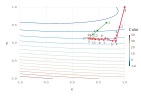

In [64]:
fun=layer((x,y)->x^2+3x*y+12y^2-x-24y, -1, 1, -1, 1);
plot(fun,scatter1,scatter2,scatter3,scatter4)